In [1]:
import pandas as pd
import numpy as np


from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")


%run Functions.ipynb

In [2]:
dpath = r"/Users/bashirulazambiswas/Documents/Sadia/SUNY courses/2022_Fall/ICSI 518 Software Engineering/Project/Results/ML data/Station data"
rpath = r"/Users/bashirulazambiswas/Documents/Sadia/SUNY courses/2022_Fall/ICSI 518 Software Engineering/Project/Results/Supervised model"

In [3]:
station_list = ['QUEE','CHES','LOUI','SCIP','BUFF']
target_list = ['temperature','precipitation','humidity']
window_list = [5,15,30]
train_method_list = ['prediction with whole dataset','prediction with target only',]


QUEE
prediction with whole dataset
temperature
5
SVR
RF
LR
15
SVR
RF
LR
30
SVR
RF
LR
precipitation
5
SVR
RF
LR
15
SVR
RF
LR
30
SVR
RF
LR
humidity
5
SVR
RF
LR
15
SVR
RF
LR
30
SVR
RF
LR
prediction with target only
temperature
5
SVR


TypeError: build_model() takes 1 positional argument but 2 were given

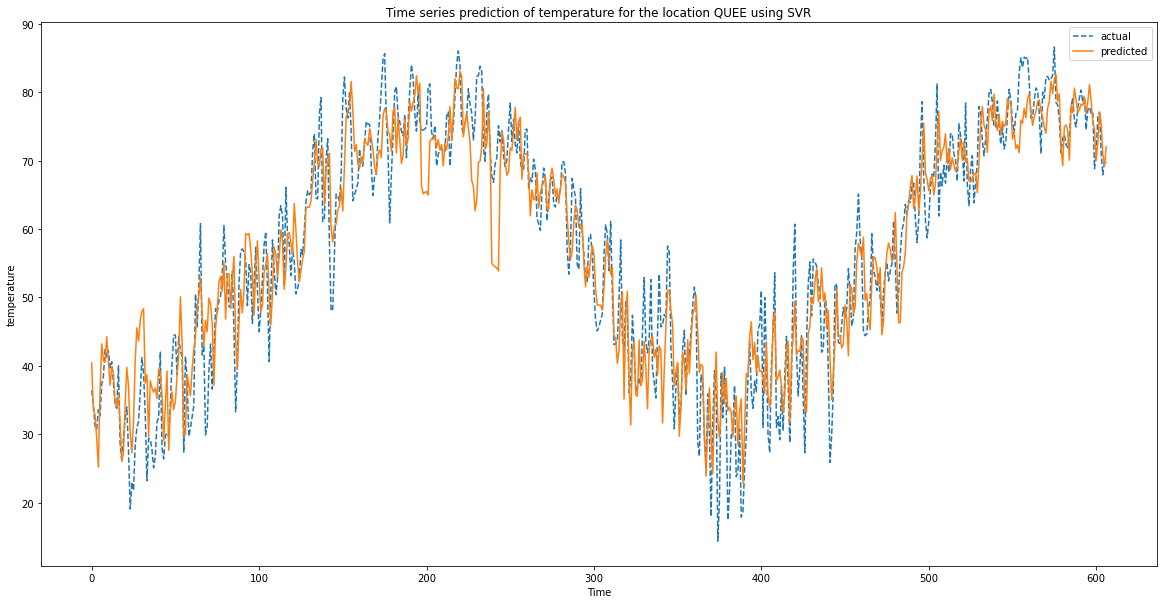

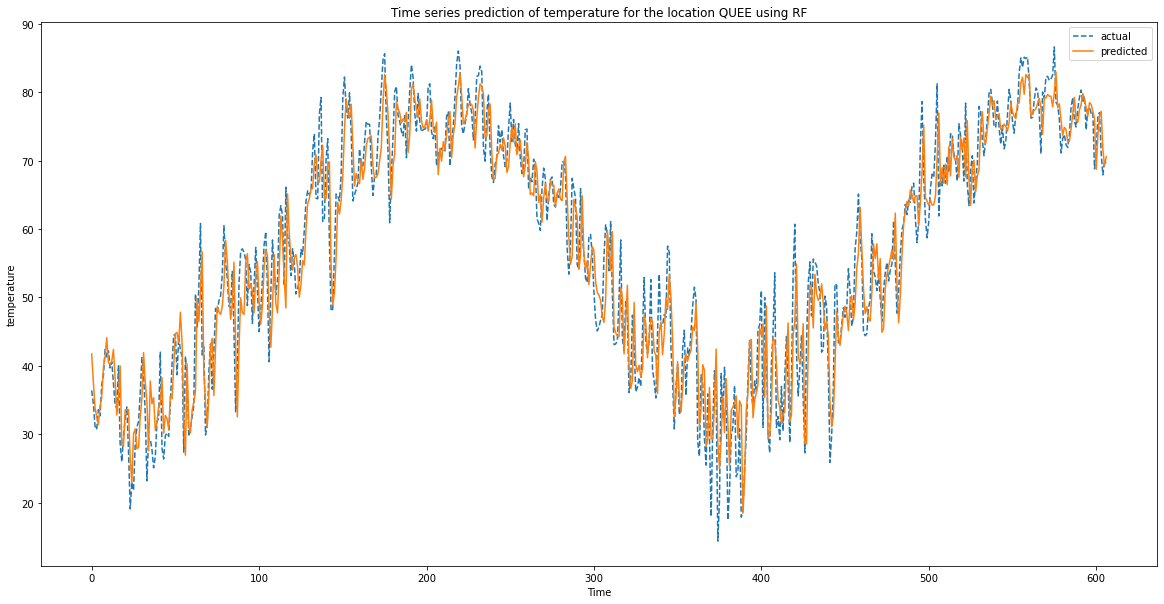

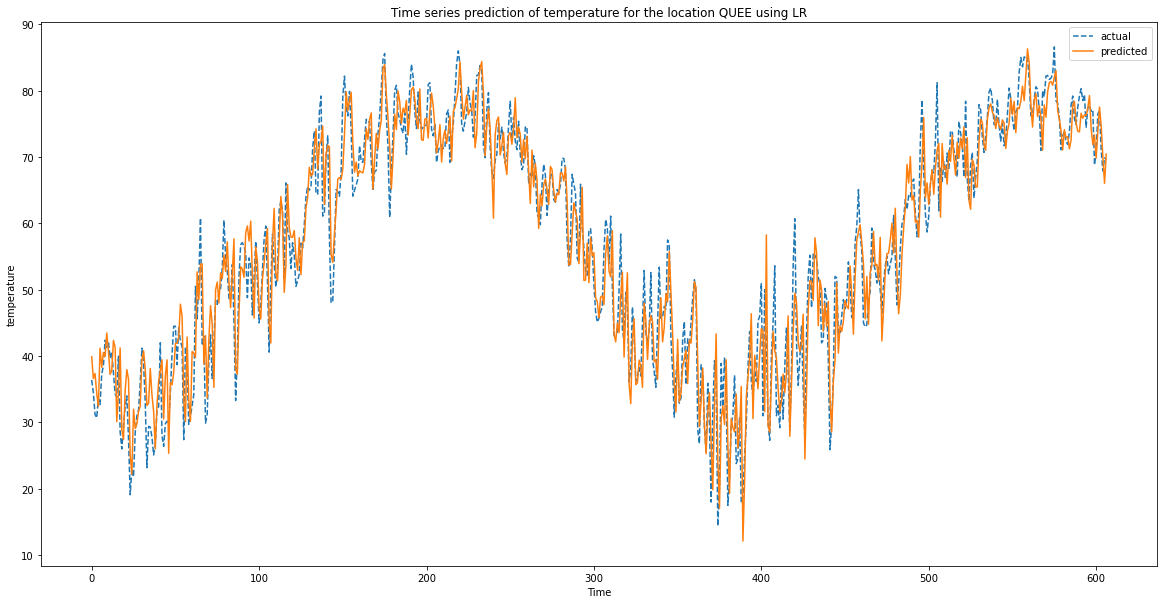

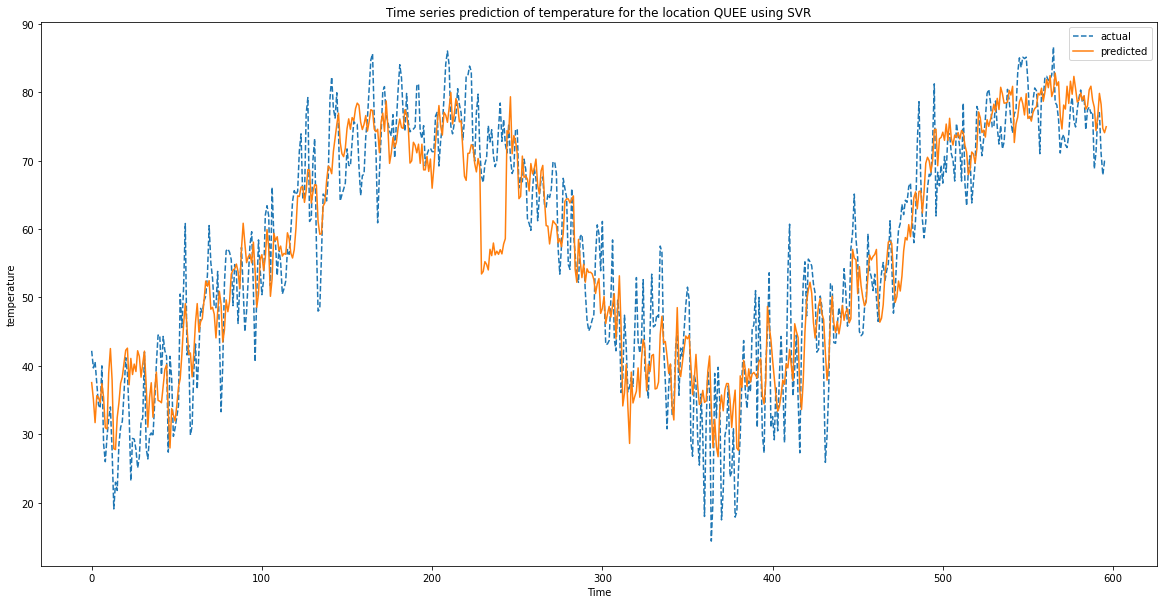

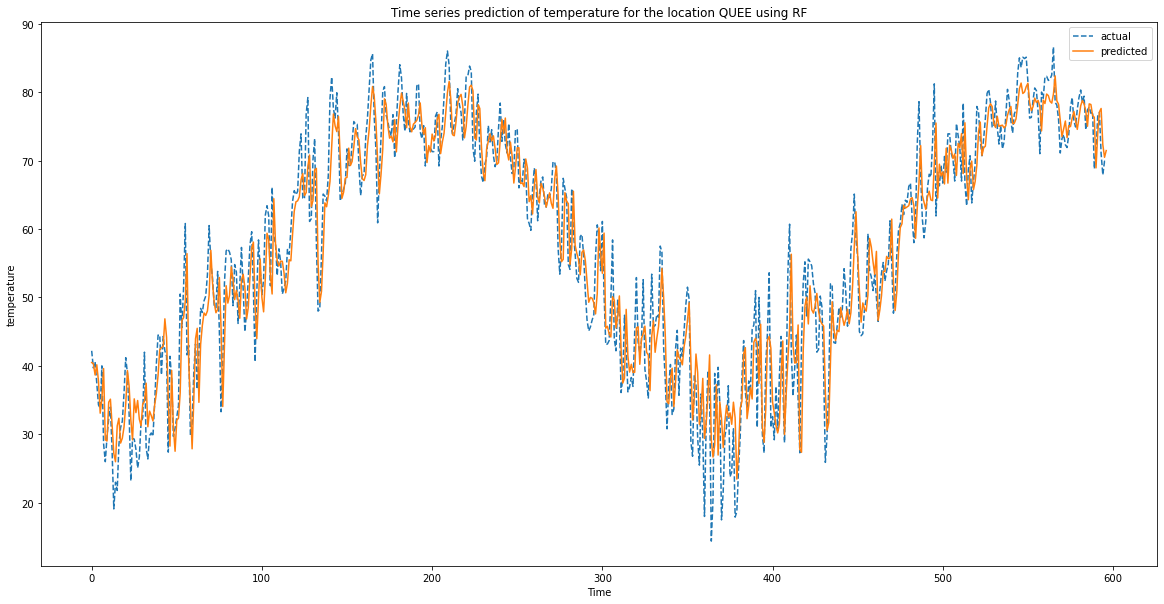

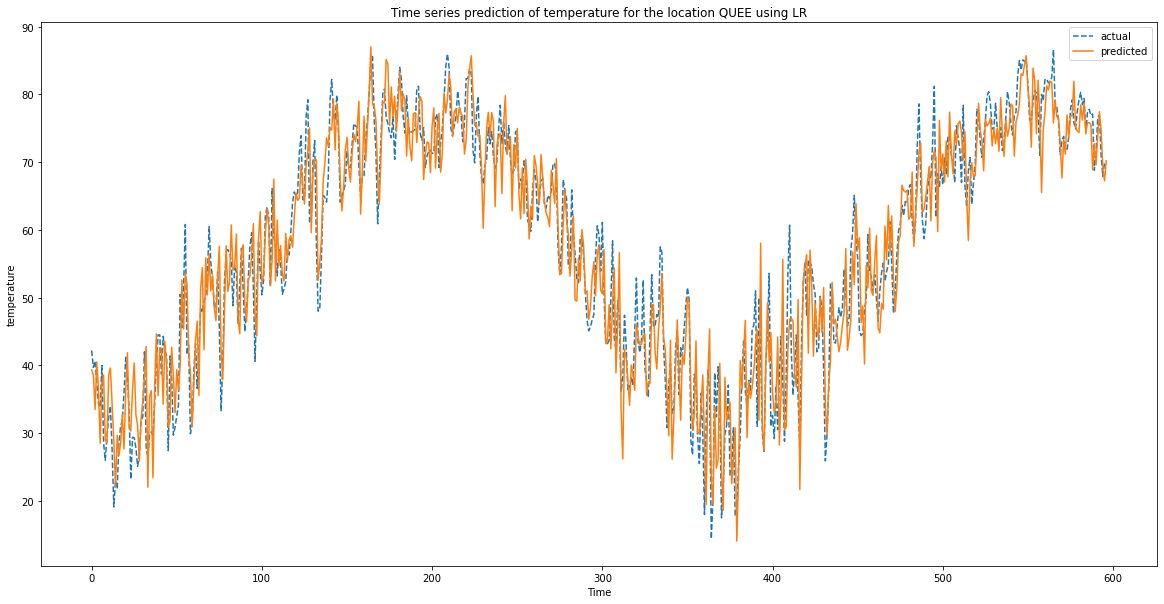

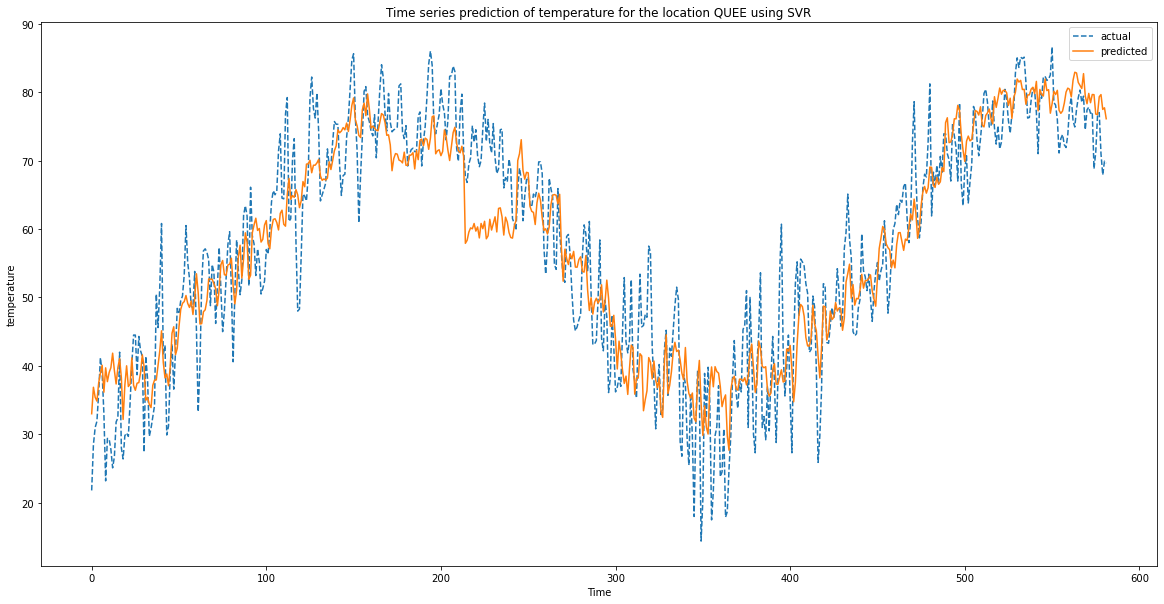

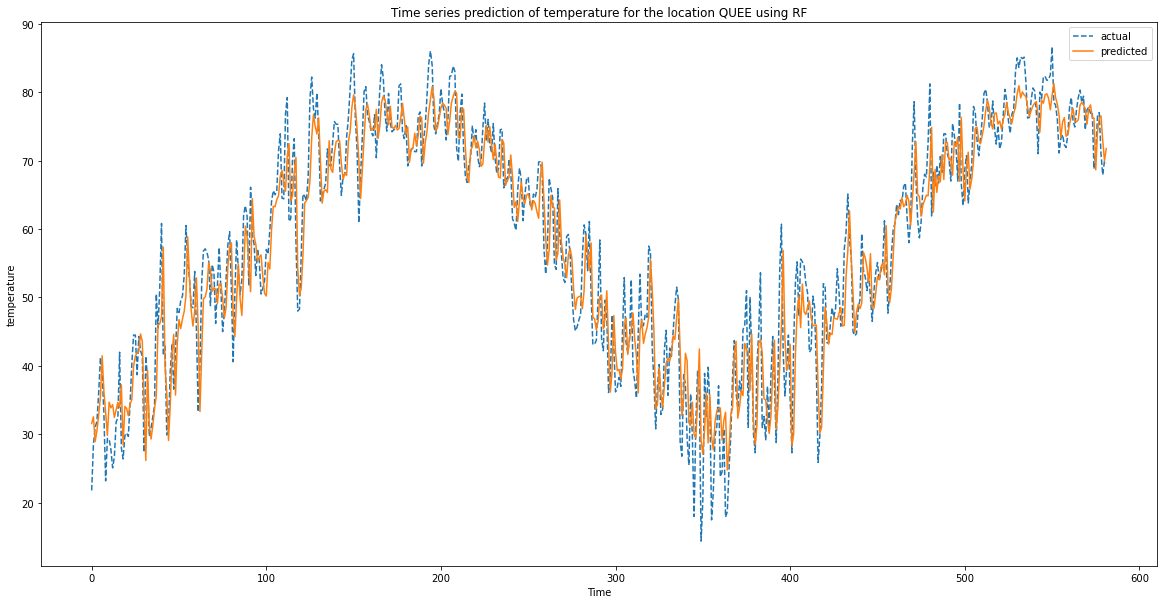

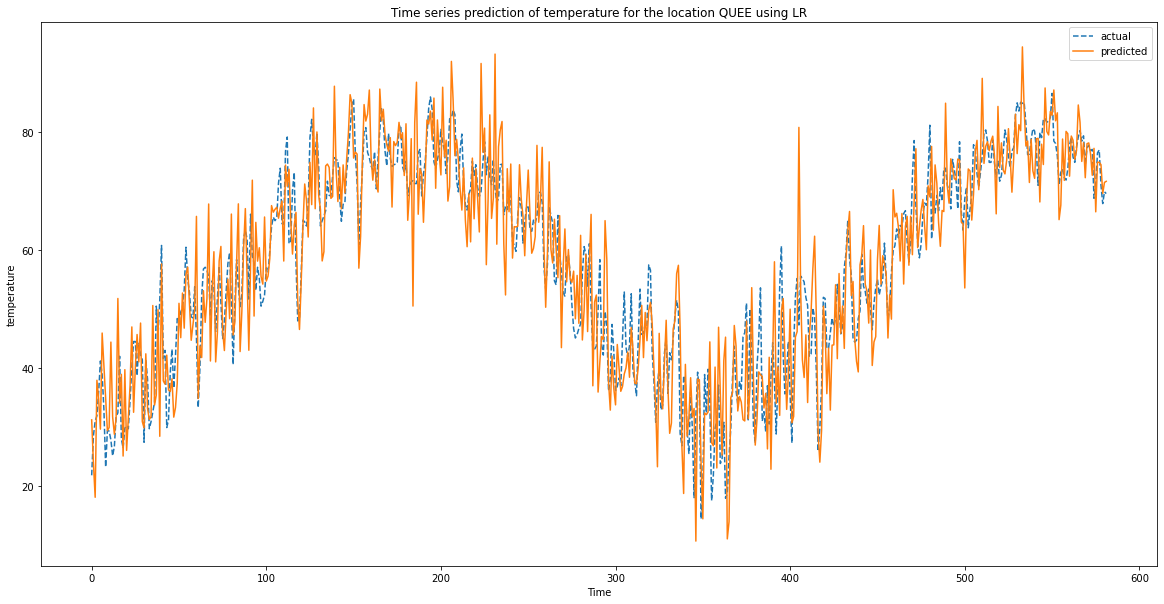

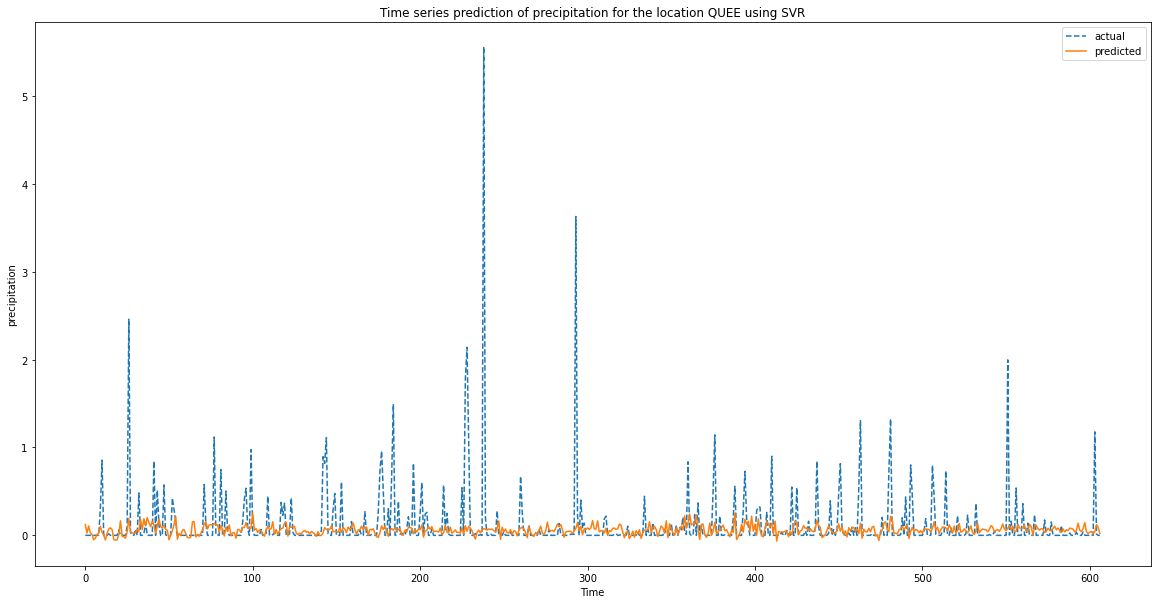

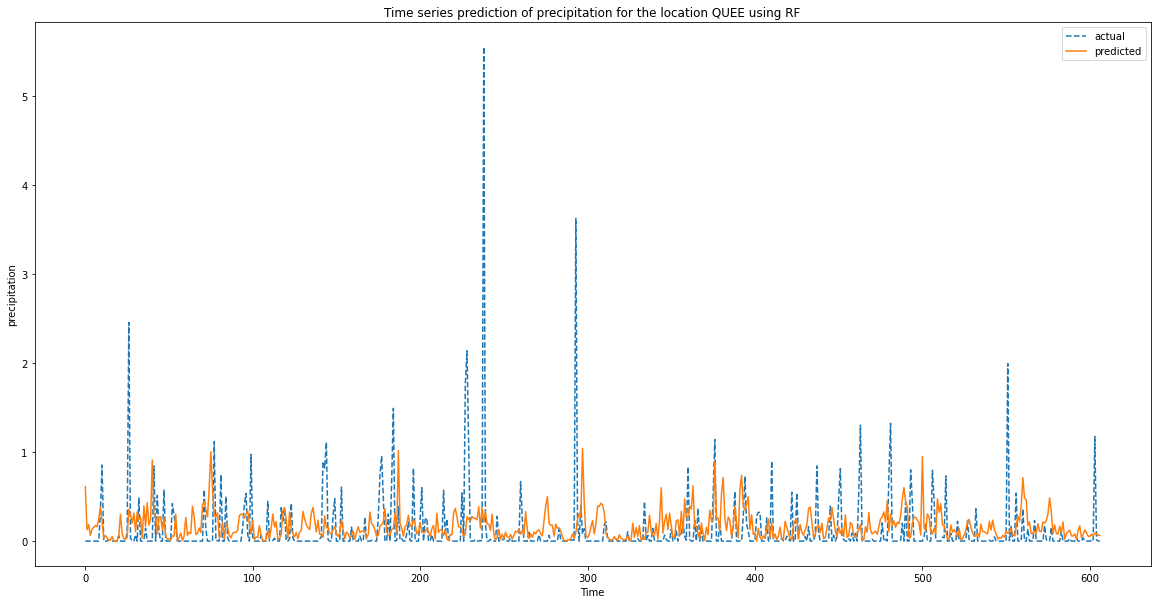

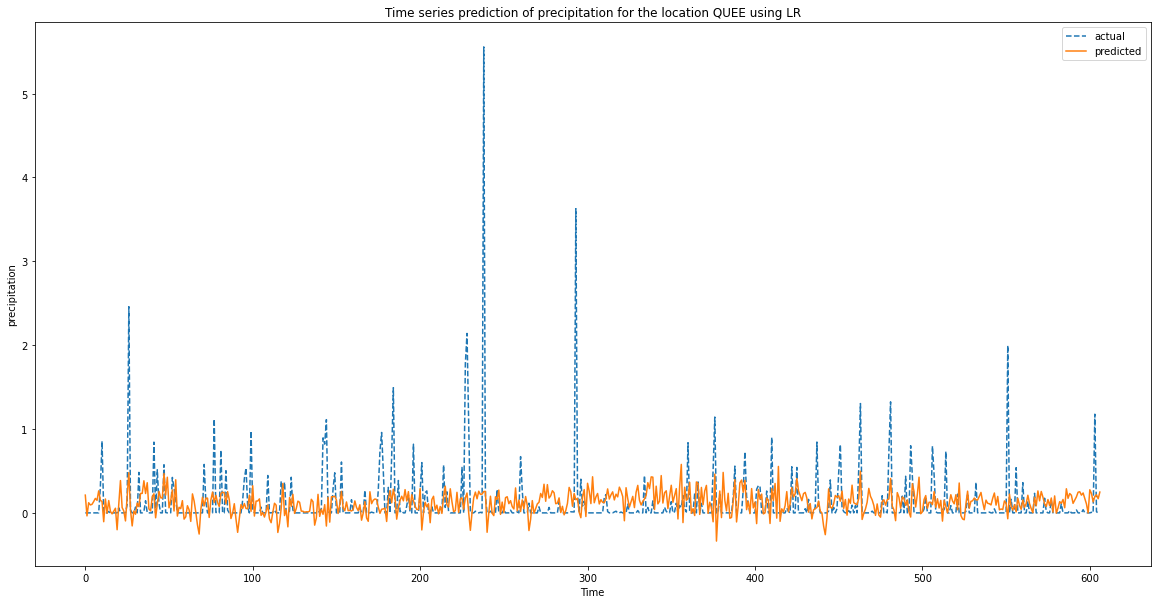

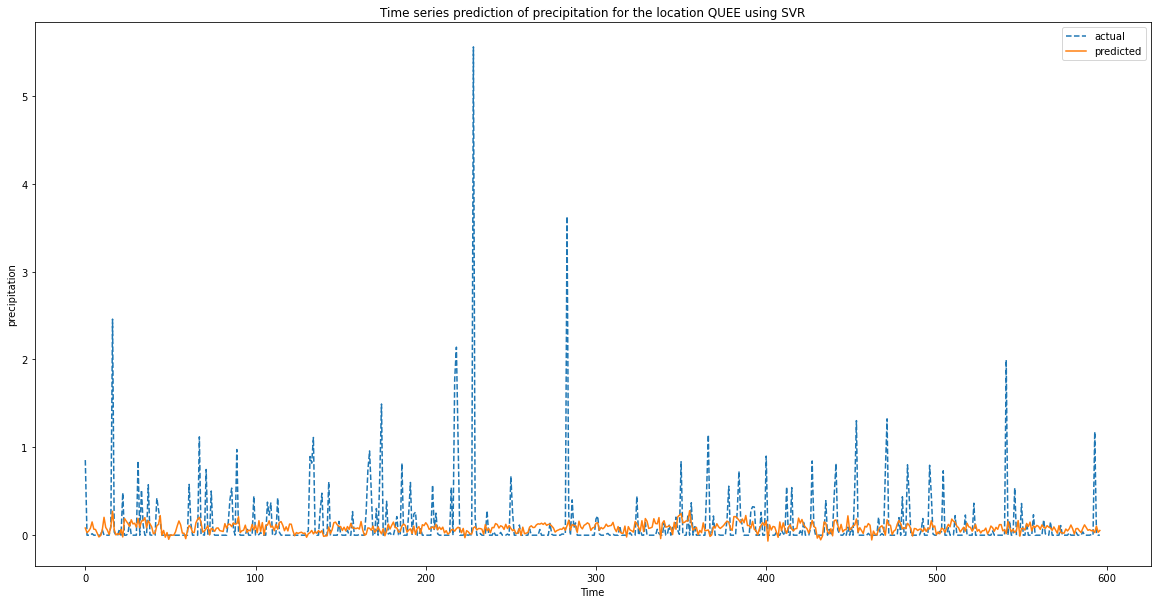

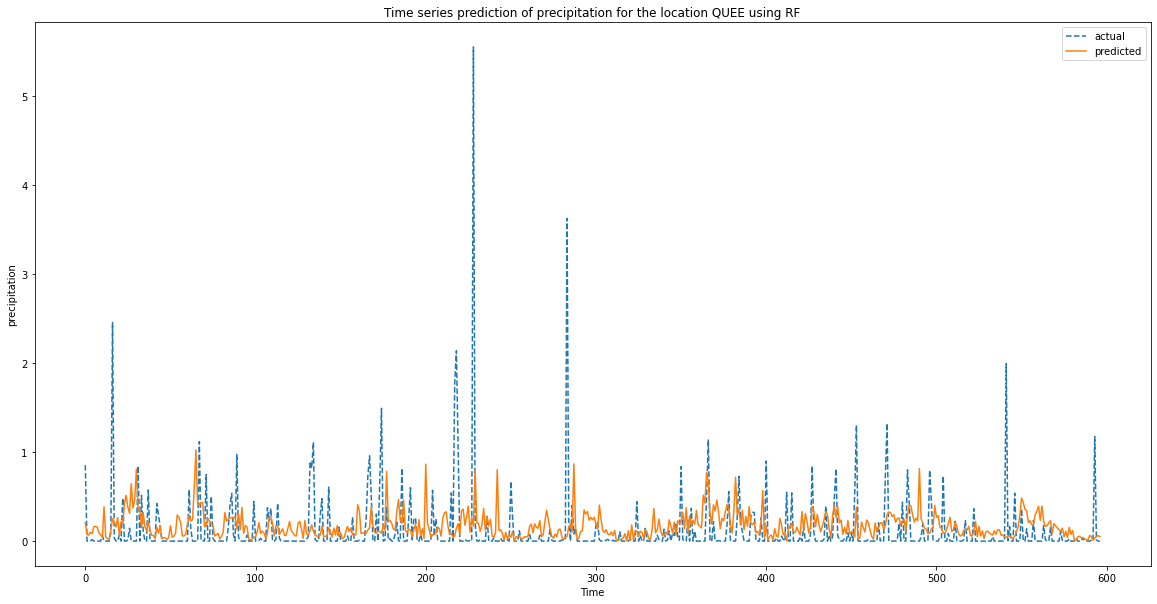

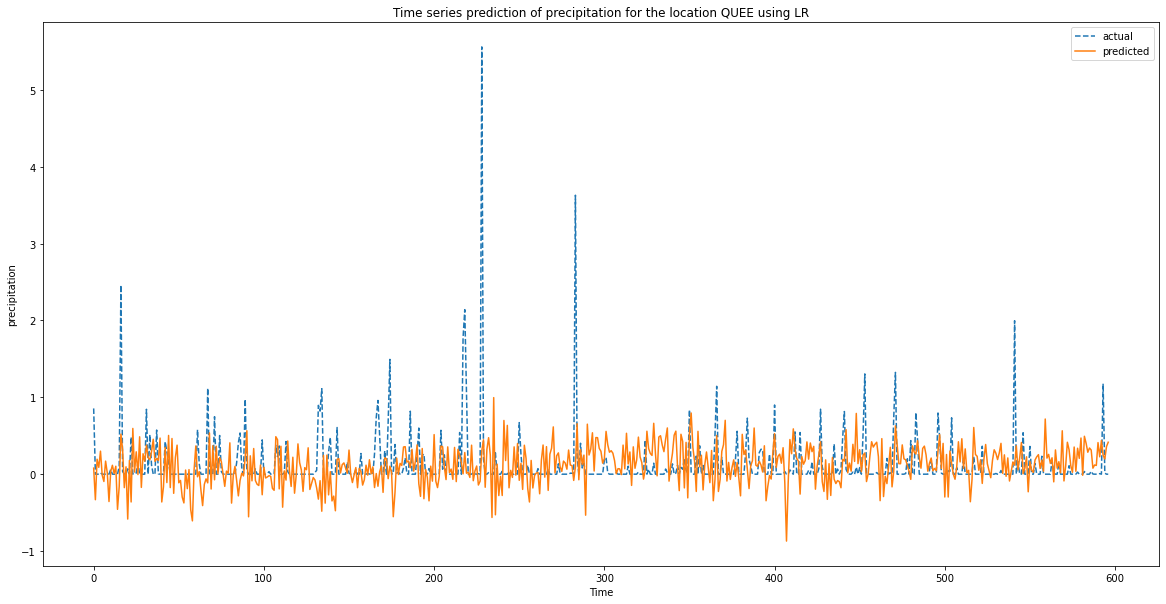

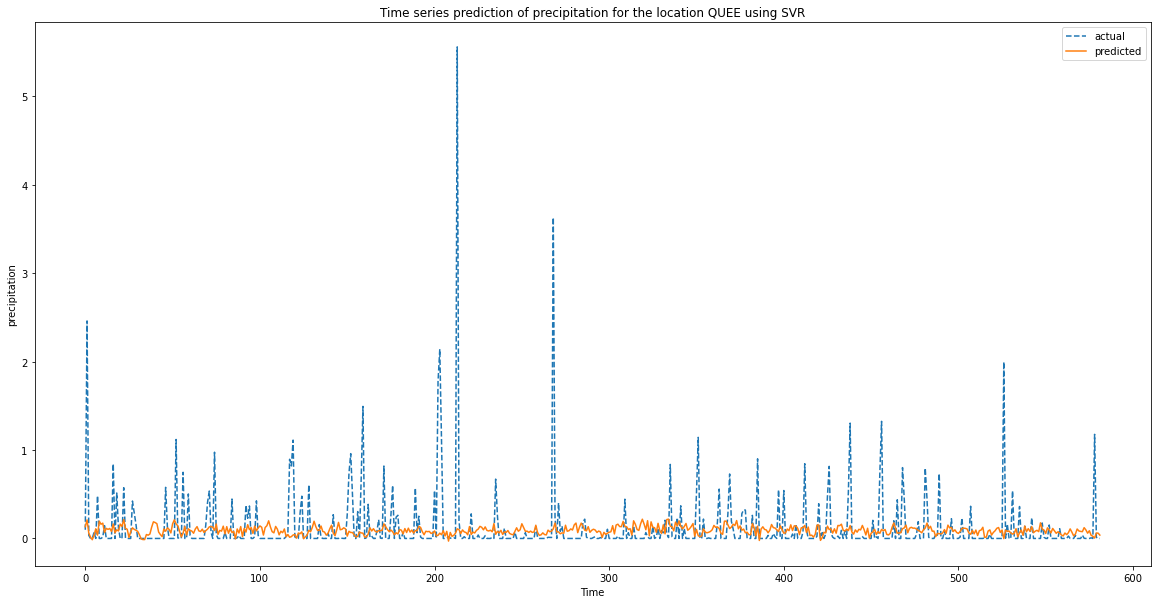

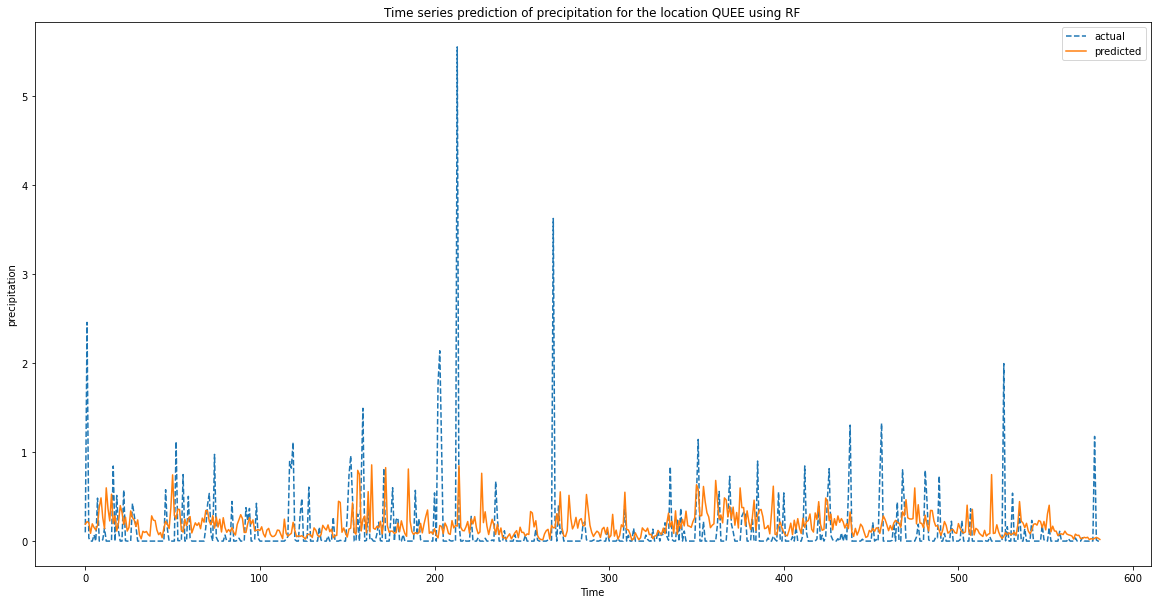

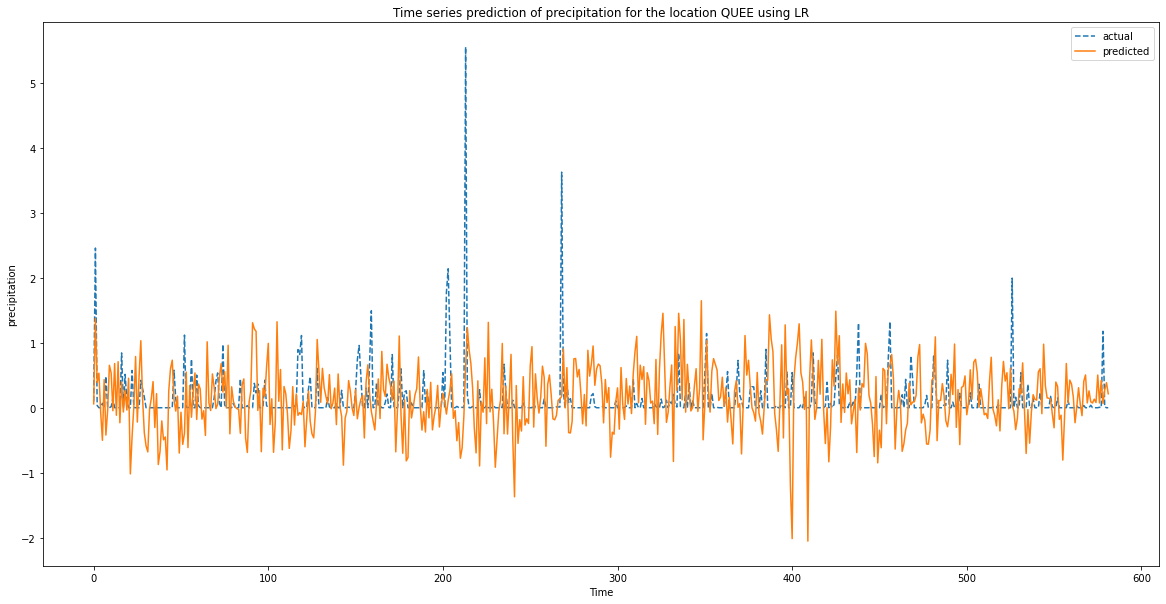

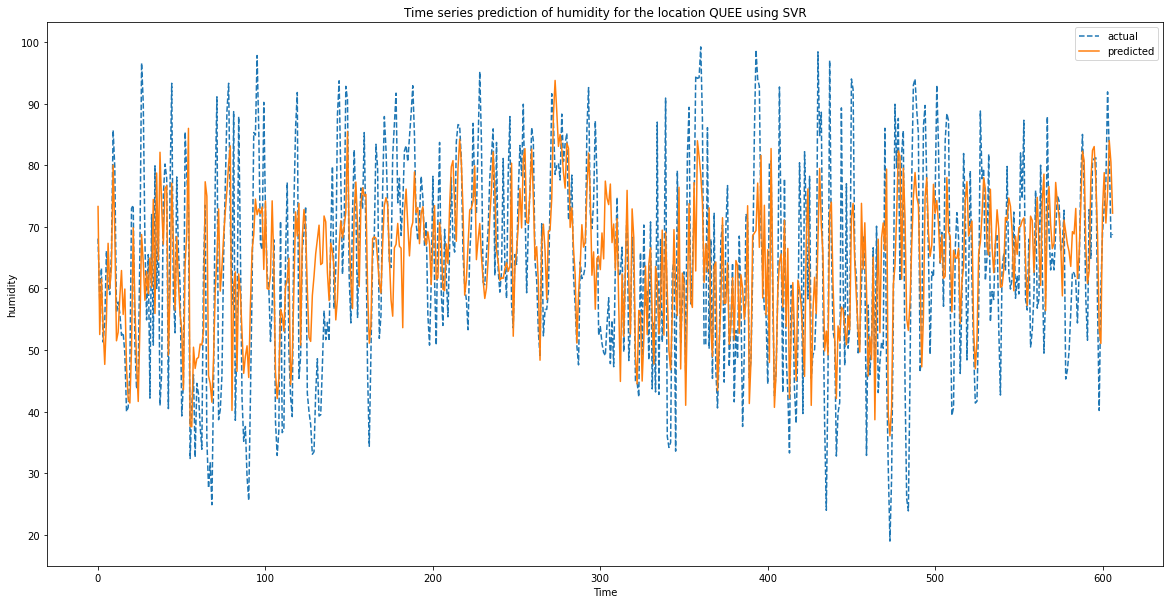

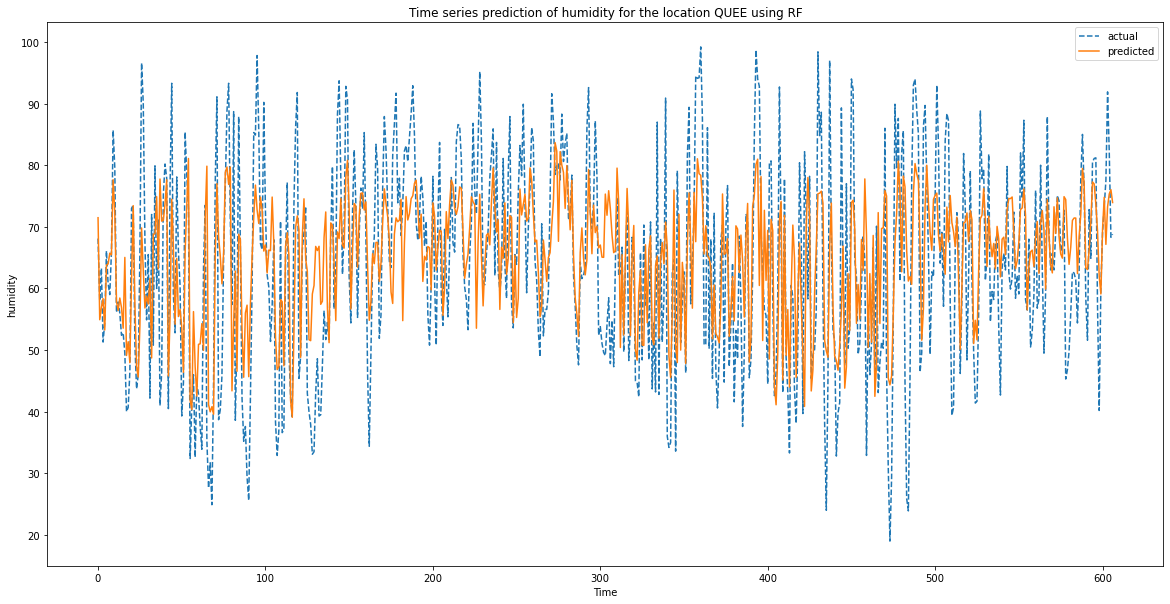

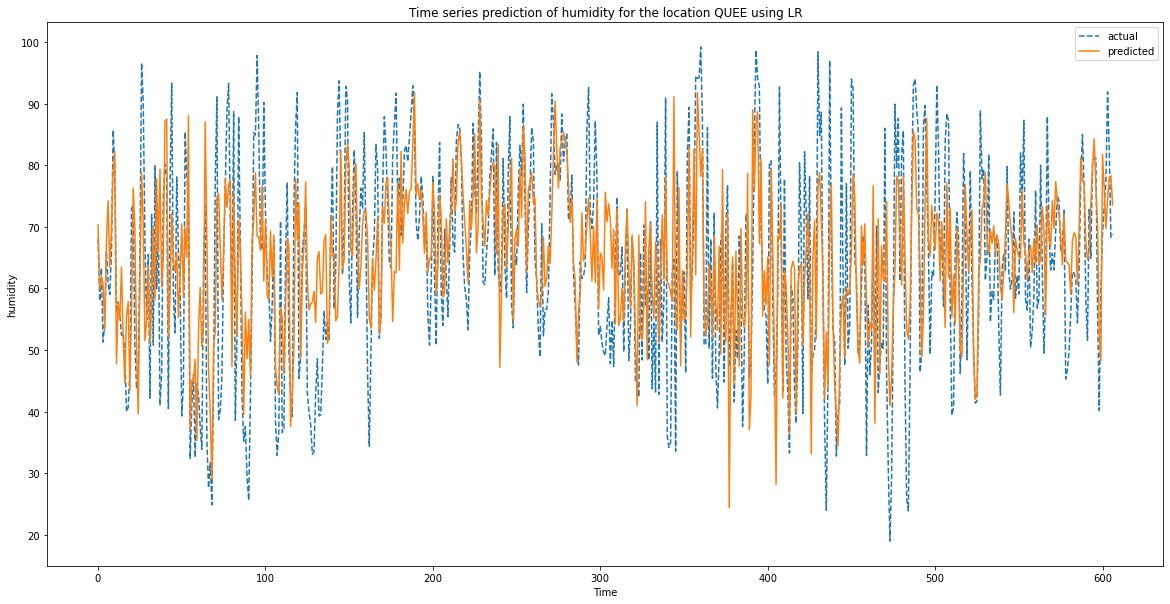

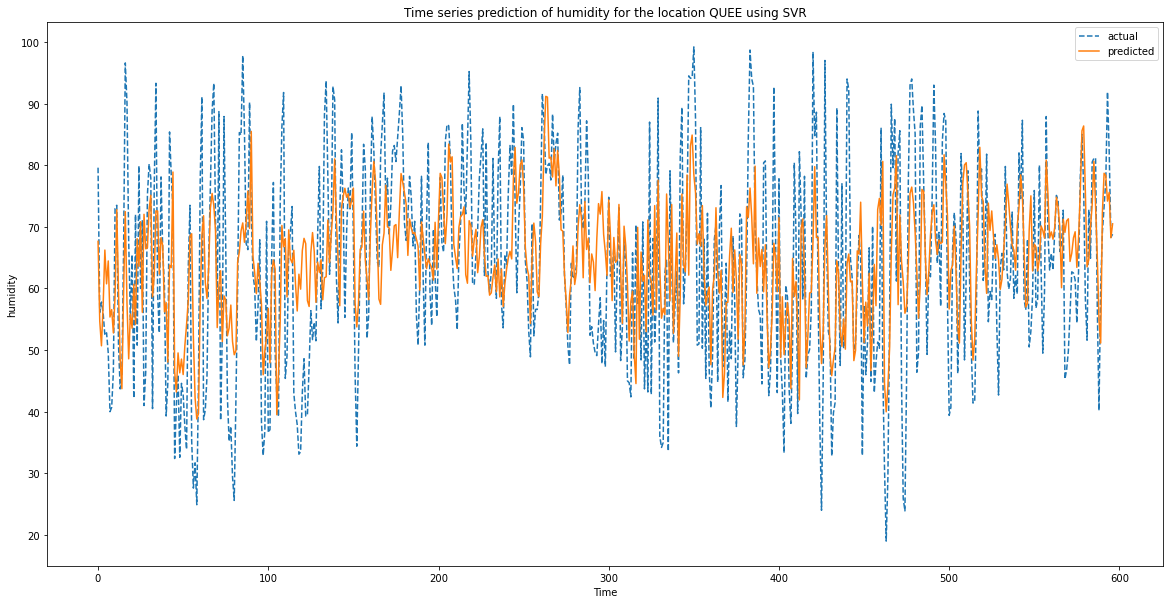

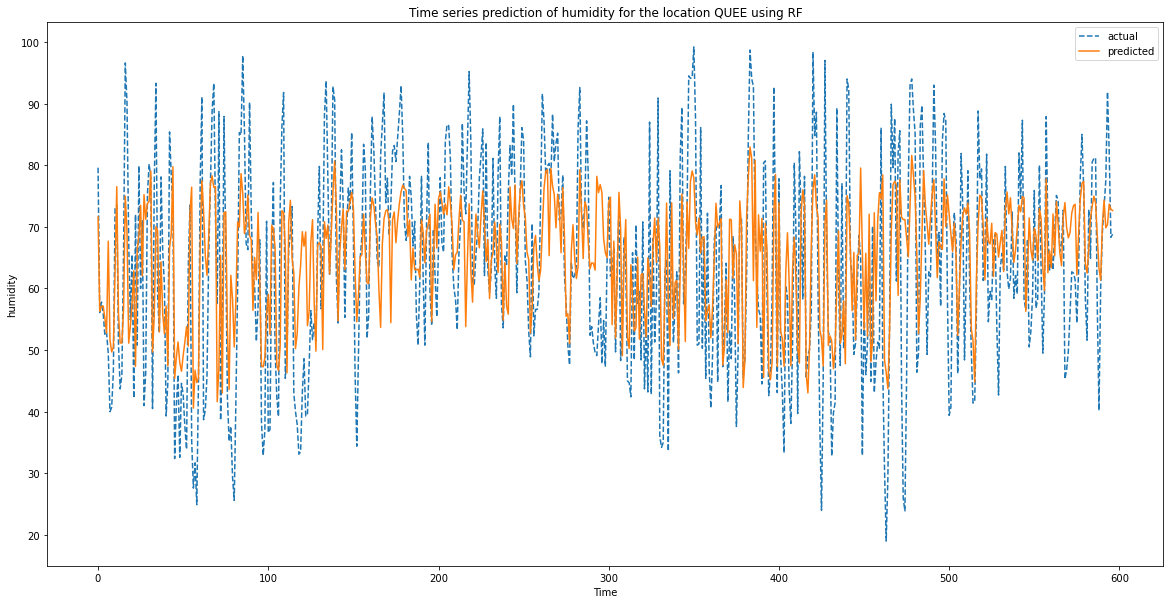

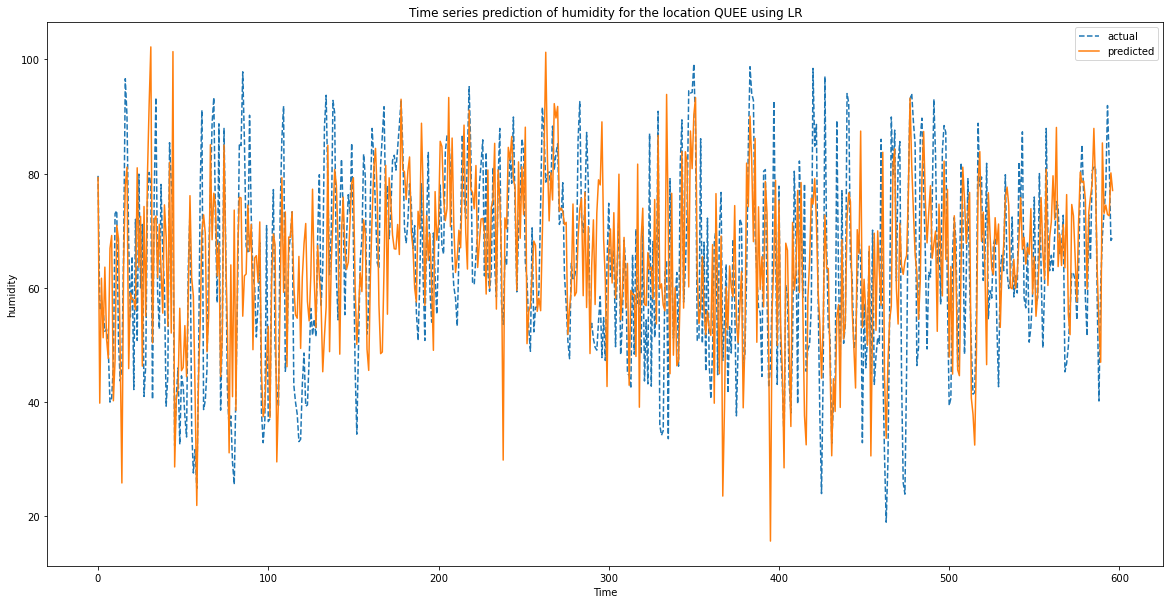

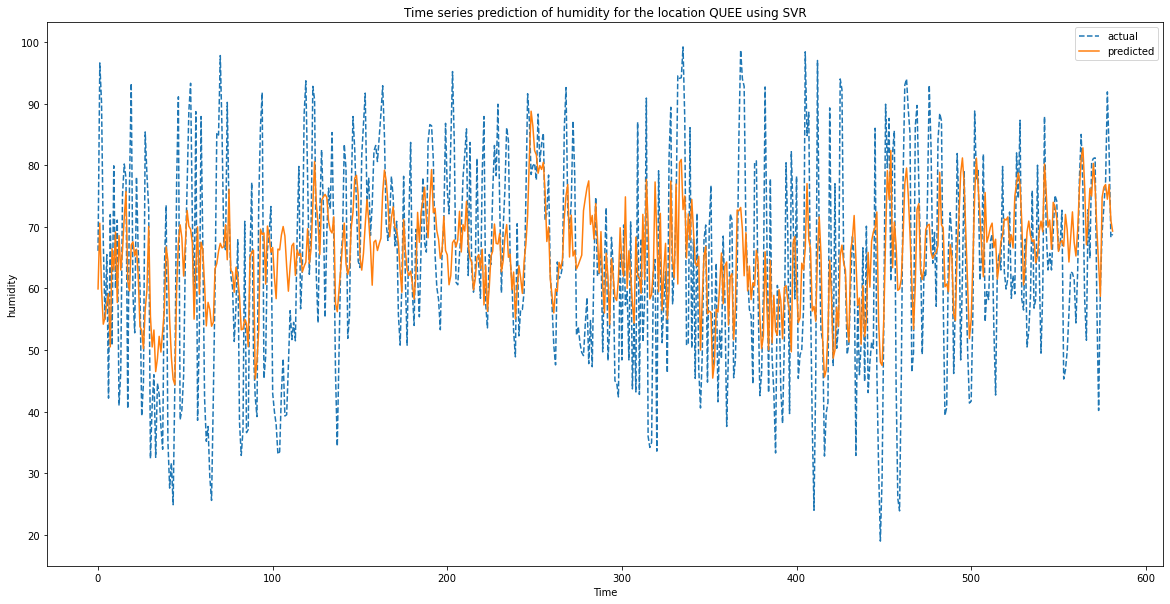

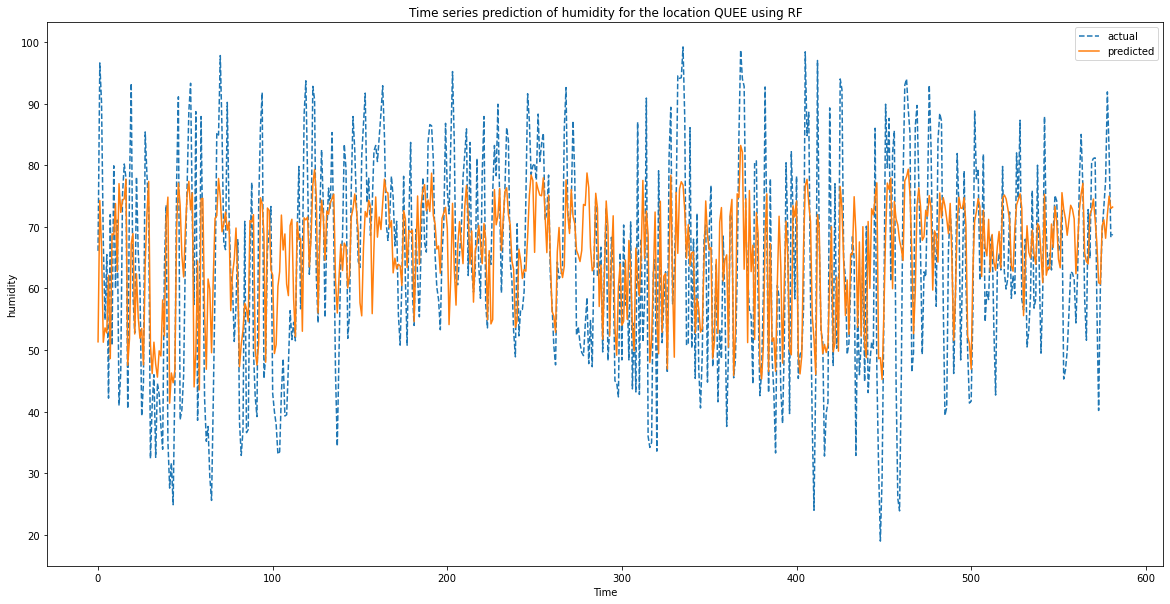

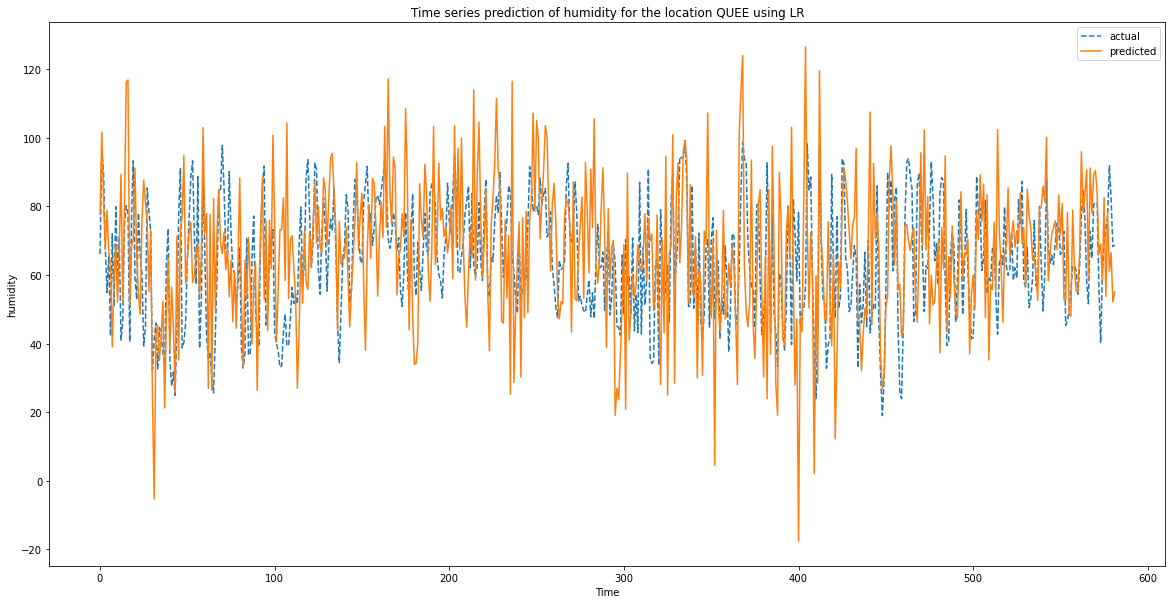

In [4]:
model_list = ['SVR','RF',"LR",]
mae_df = pd.DataFrame(columns = ['station','model','train_method','target','window',"mae"])
for station_name in station_list:
    print(station_name)
    for train_method in train_method_list:
        print(train_method)
        for target_variable in target_list:
            print(target_variable)
            for window in window_list:
                print(window)
                for model_name in model_list:
                    print(model_name)
                    if train_method == 'prediction with whole dataset':
                        data = data_prep(dpath, station_name,target_variable,train_method)
                        data_normalized = normalize_data(data)
                        X_train, y_train, X_test, y_test,amount_of_features = load_data(data_normalized, window,target_variable)
                        X_train = X_train.reshape(len(X_train),-1)
                        X_test = X_test.reshape(len(X_test),-1)
                        model = build_model(model_name)
                        model.fit(X_train,y_train)
                        pred = model.predict(X_test)
                        y_test_denormalized = denormalize_data(data,y_test,target_variable)
                        pred_denormalized = denormalize_data(data,pred,target_variable)
                        plt.figure(figsize=(20,10))
                        plt.plot(y_test_denormalized,'--',label='actual')
                        plt.plot(pred_denormalized,'-',label='predicted')
                        plt.legend()
                        plt.xlabel('Time')
                        plt.ylabel(target_variable)
                        plt.title("Time series prediction of "+target_variable+" for the location "+station_name+" using "+model_name)
                        plt.savefig(rpath+"//"+model_name+"//"+station_name+"_"+model_name+"_"+train_method+"_"+target_variable+"_"+str(window)+".png")
                        mae = mean_absolute_error(y_test_denormalized,pred_denormalized)
                        mae_df = mae_df.append({'station':station_name,'model':model_name,'train_method':train_method,
                                                'target':target_variable,'window':window,'mae':mae},ignore_index = True)

                    elif train_method == 'prediction with target only':
                        data = data_prep(dpath, station_name,target_variable,train_method)
                        data_normalized = normalize_data(data)
                        X_train, y_train, X_test, y_test,amount_of_features = load_data(data_normalized, window,target_variable)
                        X_train = X_train.reshape(len(X_train),-1)
                        X_test = X_test.reshape(len(X_test),-1)
                        model = build_model(model_name)
                        model.fit(X_train,y_train)
                        pred = model.predict(X_test)
                        y_test_denormalized = denormalize_data(data,y_test,target_variable)
                        pred_denormalized = denormalize_data(data,pred,target_variable)
                        plt.figure(figsize=(20,10))
                        plt.plot(y_test_denormalized,'--',label = 'actual')
                        plt.plot(pred_denormalized,'-',label = 'predicted')
                        plt.legend()
                        plt.xlabel('Time')
                        plt.ylabel(target_variable)
                        plt.title("Time series prediction of "+target_variable+" for the location "+station_name+" using "+model_name)
                        plt.savefig(rpath+"//"+model_name+"//"+station_name+"_"+model_name+"_"+train_method+"_"+target_variable+"_"+str(window)+".png")
                        mae = mean_absolute_error(y_test_denormalized,pred_denormalized)
                        mae_df = mae_df.append({'station':station_name,'model':model_name,'train_method':train_method,
                                                'target':target_variable,'window':window,'mae':mae},ignore_index = True)
                

In [ ]:
mae_df.to_csv(rpath+"//LR-RF-SVR.csv")
